<a href="https://colab.research.google.com/github/Neuro-Algorithm/diabetes-prediction/blob/main/Diabetes_Prediction_Using_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
diabetes = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
diabetes_group = diabetes.groupby('Outcome')

In [ ]:
from pandas.tseries.offsets import YearBegin
X = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
Scaler = StandardScaler()
Standardised_data = Scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Classifier = svm.SVC(kernel='linear')
Classifier.fit(X_train, Y_train)

X_train_prediction = Classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy of the traing data :', training_data_accuracy)

X_test_prediction = Classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy of the test data :', test_data_accuracy)

Accuracy of the traing data : 0.7833876221498371
Accuracy of the test data : 0.7727272727272727


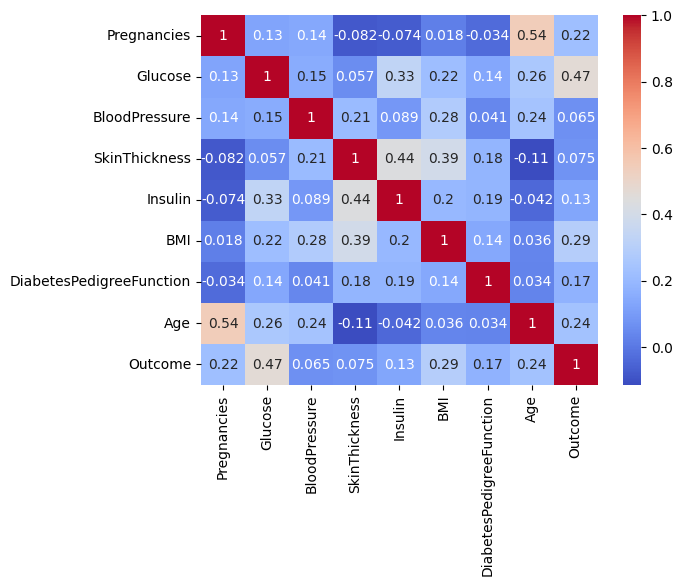

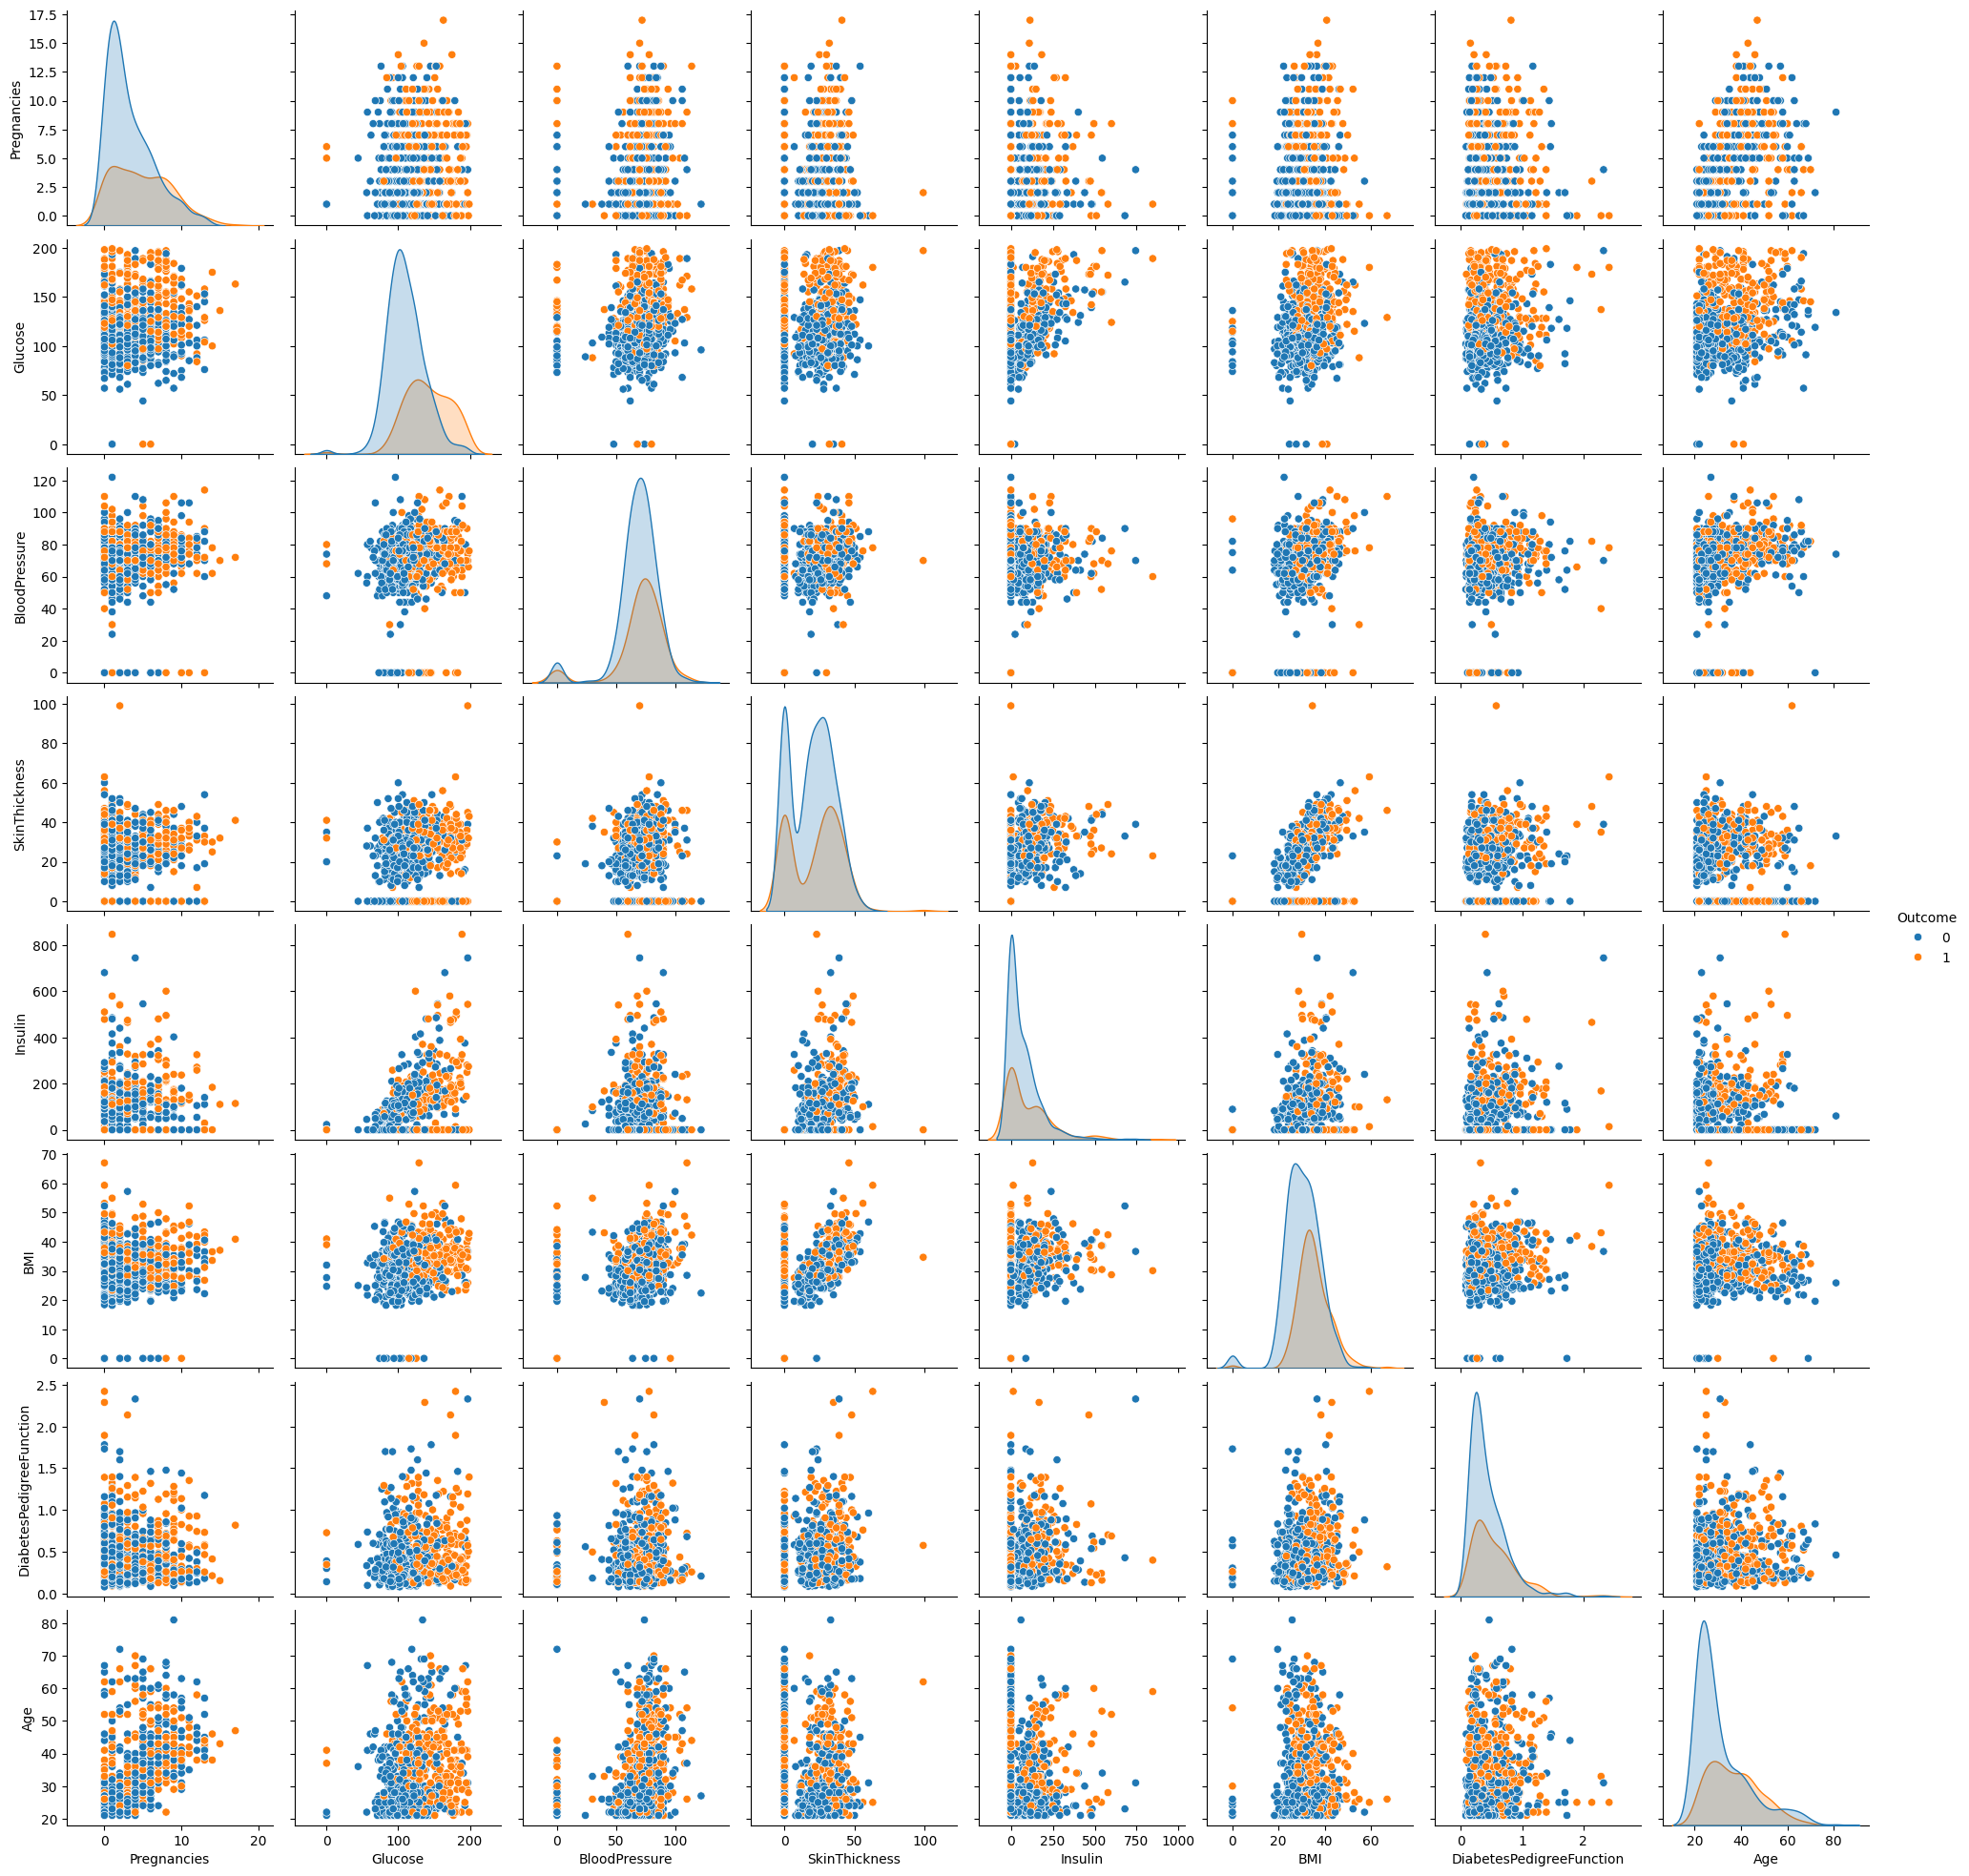

In [ ]:
sns.heatmap(data=diabetes.corr(), annot=True, cmap='coolwarm')


sns.pairplot(data=diabetes, hue='Outcome')

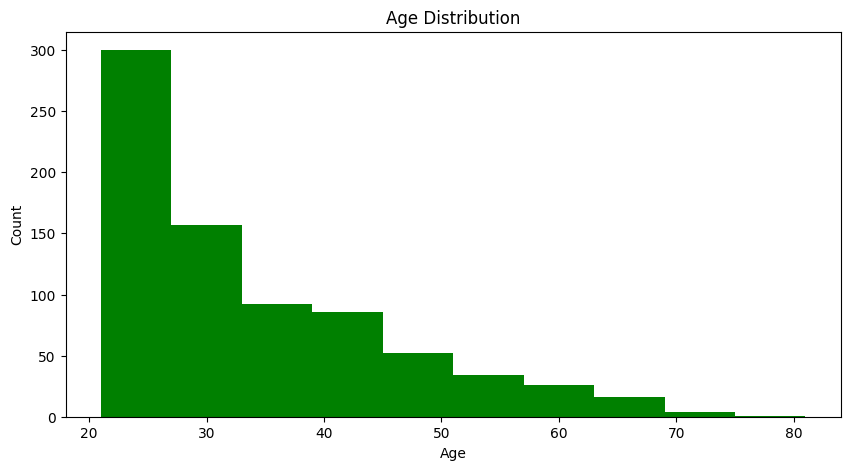

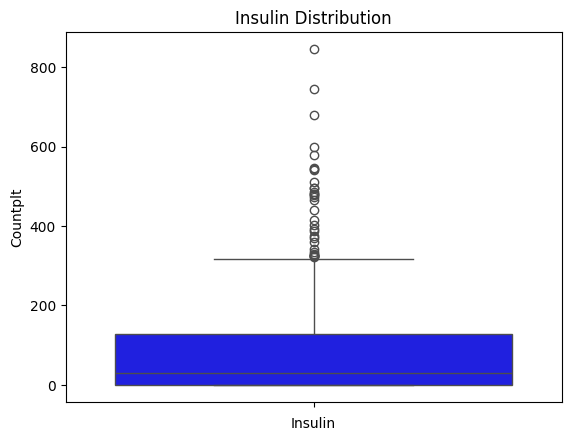

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(diabetes['Age'], color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


sns.boxplot(data=diabetes['Insulin'], color='blue')
plt.title('Insulin Distribution')
plt.xlabel('Insulin')
plt.ylabel('Countplt')
plt.show()

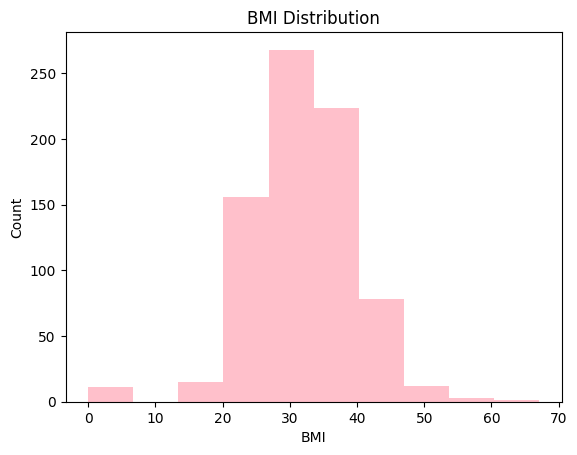

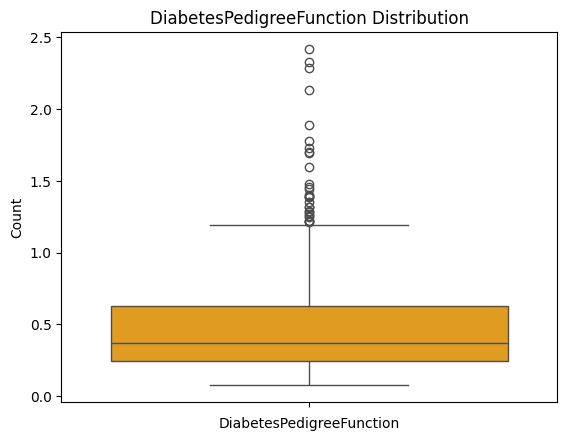

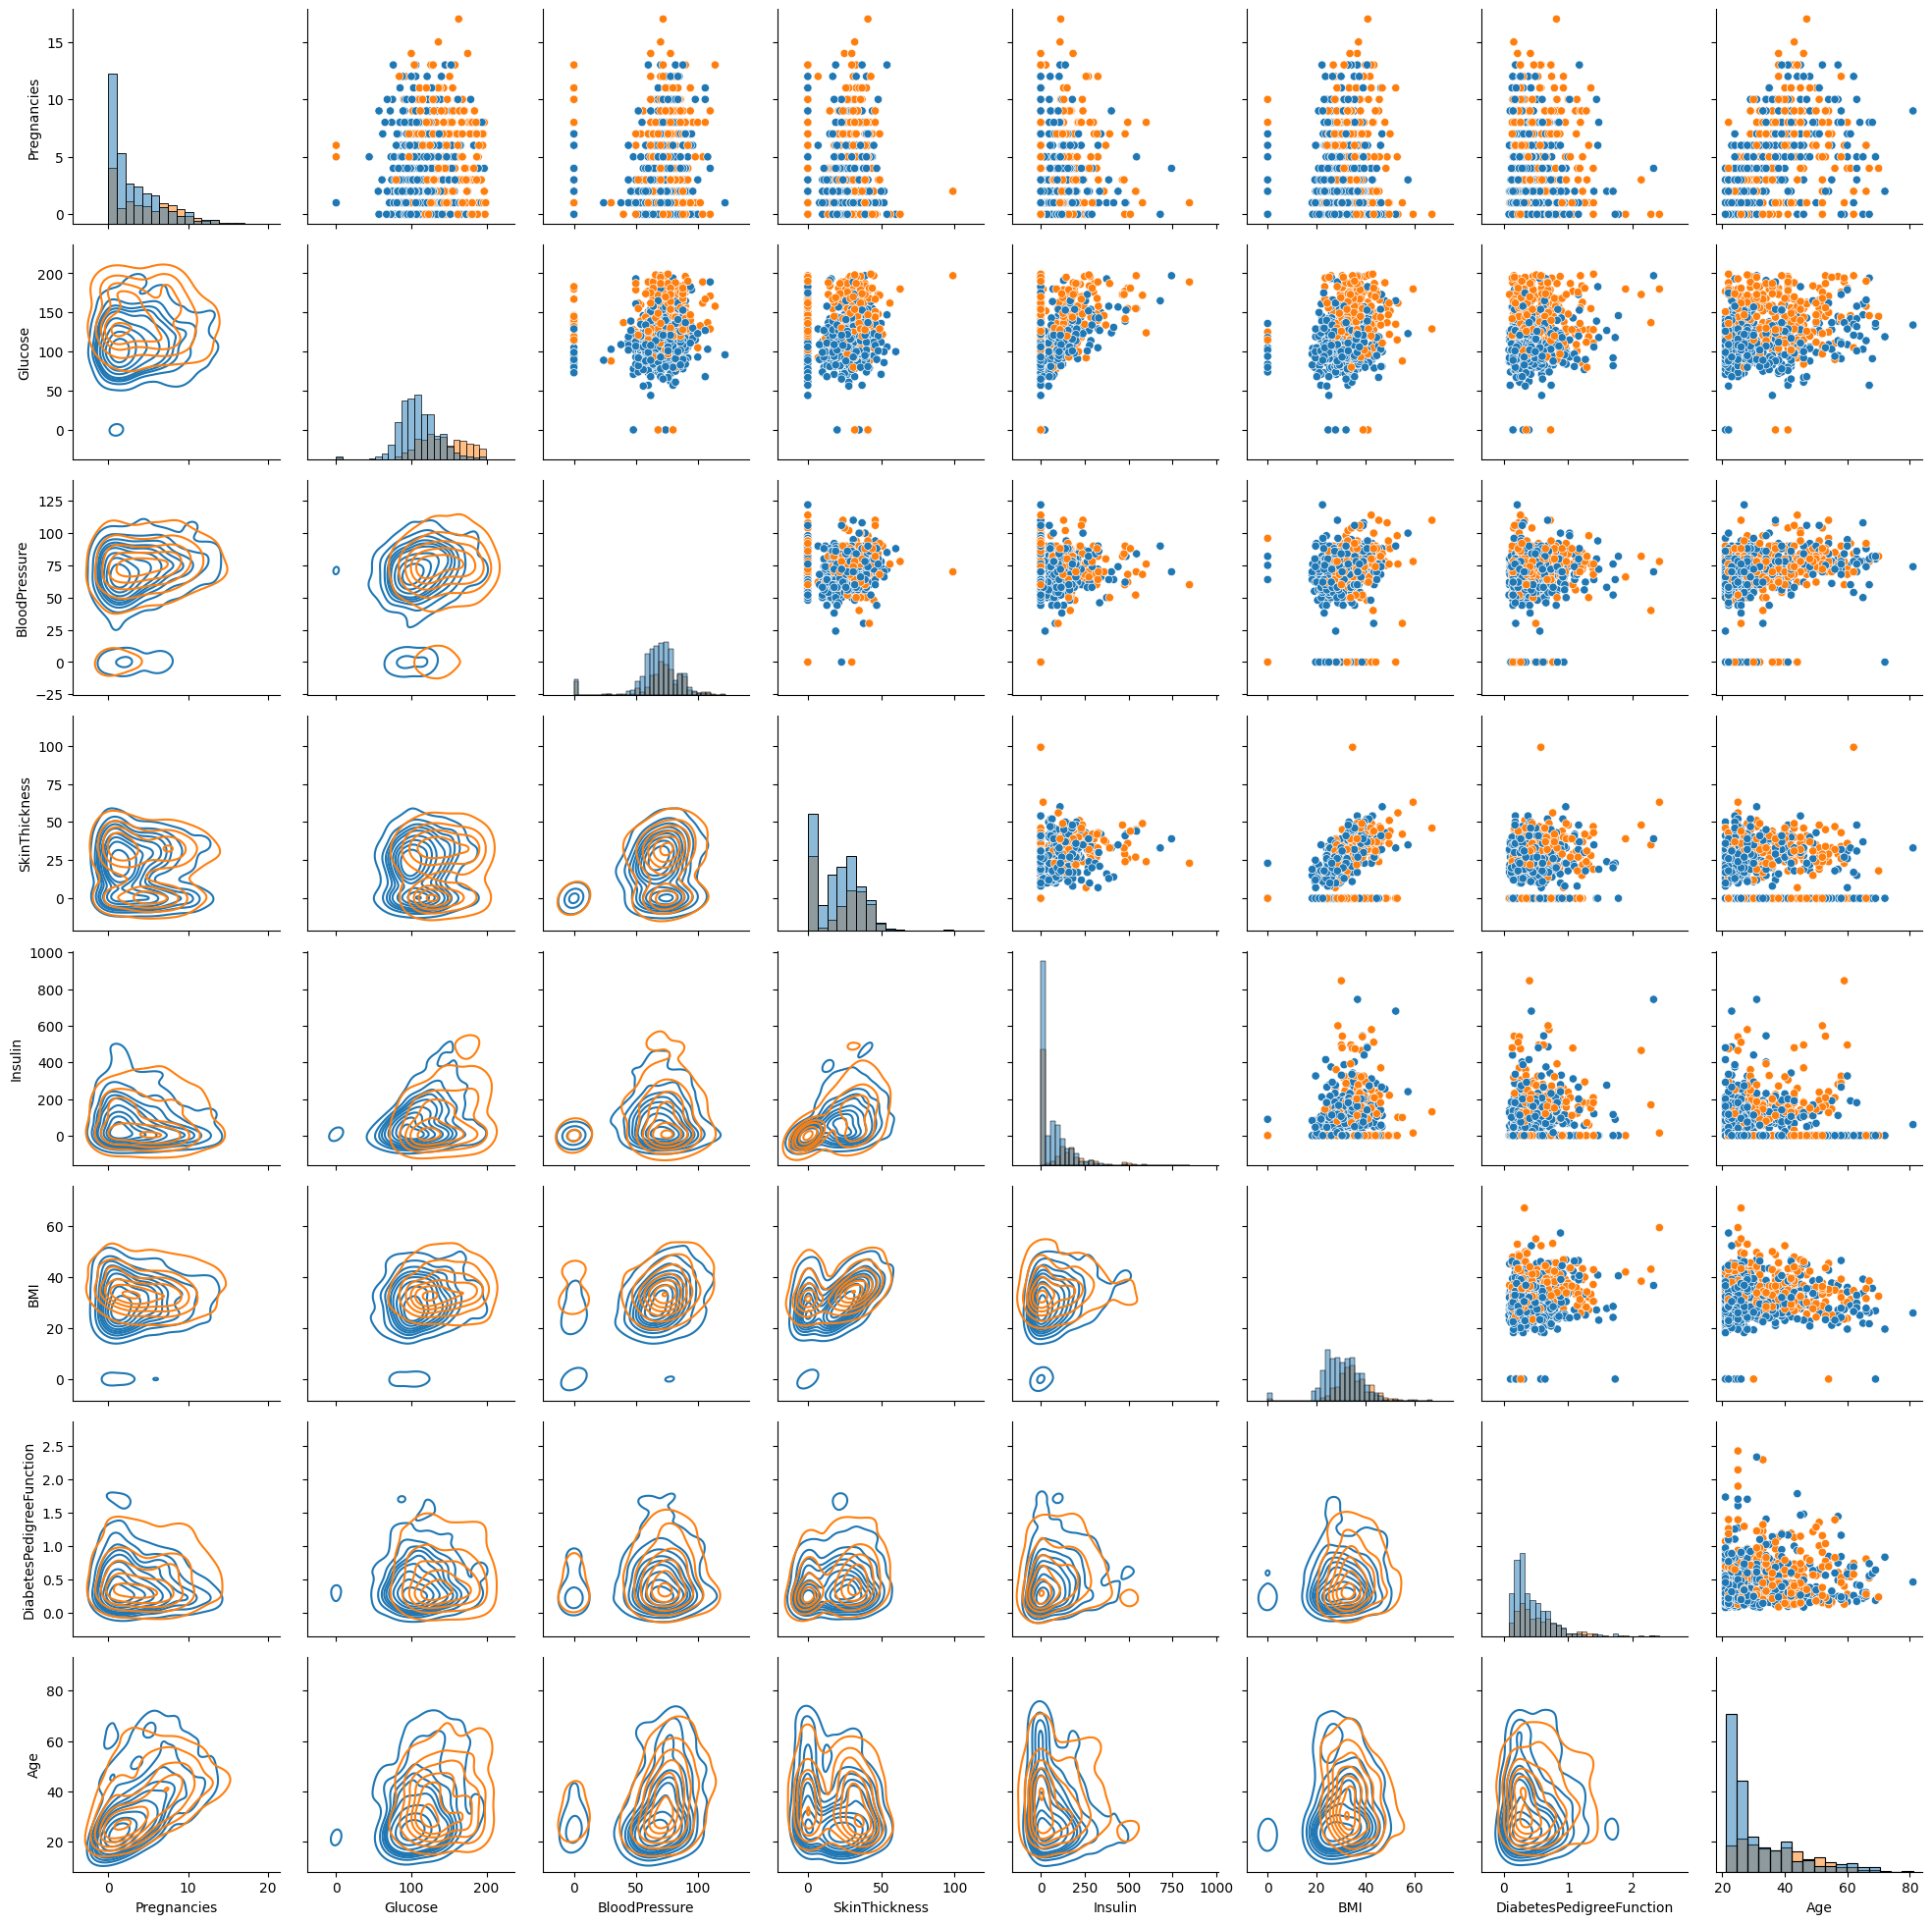

In [ ]:
plt.hist(diabetes['BMI'], color='pink')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


sns.boxplot(data=diabetes['DiabetesPedigreeFunction'], color='orange')
plt.title('DiabetesPedigreeFunction Distribution')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.show()


sns.PairGrid(diabetes, hue='Outcome').map_upper(sns.scatterplot).map_lower(sns.kdeplot).map_diag(sns.histplot)

*Making a predictive system for diabetic detection*

In [ ]:
input_data = (1,189,60,23,846,30.1,0.398,59)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = Scaler.transform(input_data_reshaped)
print(std_data)


prediction = Classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Diabetes Detected')
else:
  print('Diabetes not Detected')

[[-0.84488505  2.13150675 -0.47073225  0.15453319  6.65283938 -0.24020459
  -0.2231152   2.19178518]]
[0]
Diabetes Detected


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
